# <b>Abstract</b>

Beam Search is a search algorithm used in natural language processing and machine learning to generate sequences of text or make decisions. Beam Search has the ability to concurrently explore multiple potential paths or sequences.In essence, beam search helps generate text that's more coherent and contextually relevant by considering multiple possibilities and selecting the most promising ones as it progresses.

The primary objective of this study is to evaluate and contrast the response time and memory usage of output text generation when Beam Search is used versus using default search.

Our emphasis will be on two key domains :
1. Text generation
2. Machine translation

For text generation, we will employ three distinct models GPT-2, DistilGPT-2, and XLNet from the HuggingSpace Transformers library. Each model will be given some input texts and both Beam Search and default search will be compared for text generation and the response time, as well as the memory usage will be recorded and compared.

For machine translation, MarianMT, a machine translation framework is used for the translation. We will be translating text from English to three different languages, French, Bahasa Malaysia and Chinese. Each language will be translated using both Beam search and default search and the response time, as well as the memory usage will be recorded and compared.

# <b>Install Necessary Libraries</b>
Please run this cell first before running all other sections

In [1]:
!pip install transformers
!pip install SentencePiece
!pip install memory-profiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 102.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.2 MB/s eta 0:00:00


# <b>Text Generation with GPT-2</b>

<h3><b>Check Initial available memory</b><h3>

In [2]:
import psutil

# Get available memory in bytes
available_memory = psutil.virtual_memory().available

# Convert bytes to megabytes for readability
available_memory_mb = available_memory / (1024 ** 2)

print(f"Initial Available Memory: {available_memory_mb:.2f} MB")

Initial Available Memory: 11937.03 MB


<h3><b>Define the model and prompt</b><h3>

In [3]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

input_text = "Hello, my dog is cute and"
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

<h3><b>Text generation with GPT-2 using two beams</b><h3>

In [4]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Function for text generation with one beam search
def generate_text_gpt2_twoBeam():
    output = model.generate(input_ids, max_length=100, num_beams=2,no_repeat_ngram_size=2,early_stopping=True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Testing for text generation using gpt2 model with one beam
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_twoBeam = generate_text_gpt2_twoBeam()
end_time = time.time()
response_time_gpt2_twoBeam = end_time - start_time
# Measure memory usage
memory_used_gpt2_twoBeam = memory_usage(generate_text_gpt2_twoBeam)

# Print results for text generation with gpt2 model using one beam
print("Generated Text (GPT-2 with Beam Search using two beam):", generated_text_gpt2_twoBeam)
print(f"Response Time: {response_time_gpt2_twoBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_twoBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (GPT-2 with Beam Search using two beam): Hello, my dog is cute and I love him. I'm not sure if he's a good dog, but I think he has a lot of personality. He's very outgoing and he loves to play with his friends.

"I'm a big fan of his, and it's nice to have him around. It's been a long time since I've had a dog that I didn't like, so I just wanted to give him a chance to grow up and have a happy life
Response Time: 15.11 seconds
Memory Usage: 1081.54 MB


<h3><b>Text generation with GPT-2 using seven beams</b><h3>

In [5]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Function for text generation with seven beam search
def generate_text_gpt2_sevenBeam():
    output = model.generate(input_ids, max_length=100, num_beams=7,no_repeat_ngram_size=2, early_stopping=True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Testing for text generation using gpt2 model with seven beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_sevenBeam = generate_text_gpt2_sevenBeam()
end_time = time.time()
response_time_gpt2_sevenBeam = end_time - start_time
# Measure memory usage
memory_used_gpt2_sevenBeam = memory_usage(generate_text_gpt2_sevenBeam)

# Print results for text generation with gpt2 model using three beam
print("Generated Text (GPT-2 with Beam Search using seven beams):", generated_text_gpt2_sevenBeam)
print(f"Response Time: {response_time_gpt2_sevenBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_sevenBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (GPT-2 with Beam Search using seven beams): Hello, my dog is cute and I love him so much. I'm so happy to have him back.

Thank you for taking the time out of your busy schedule to let me know what you think of my blog. It's been a long time coming, but I hope you enjoy it as much as I do.
Response Time: 15.27 seconds
Memory Usage: 1157.48 MB


<h3><b>Text generation with GPT-2 using twenty-five beams</b><h3>

In [6]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Function for text generation with twenty-five beam search
def generate_text_gpt2_twentyFiveBeam():
    output = model.generate(input_ids, max_length=100, num_beams=25,no_repeat_ngram_size=2, early_stopping=True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Testing for text generation using gpt2 model with twenty-five beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_twentyFiveBeam = generate_text_gpt2_twentyFiveBeam()
end_time = time.time()
response_time_gpt2_twentyFiveBeam = end_time - start_time
# Measure memory usage
memory_used_gpt2_twentyFiveBeam = memory_usage(generate_text_gpt2_twentyFiveBeam)

# Print results for text generation with gpt2 model using five beam
print("Generated Text (GPT-2 with Beam Search using twenty-five beams):", generated_text_gpt2_twentyFiveBeam)
print(f"Response Time: {response_time_gpt2_twentyFiveBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_twentyFiveBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (GPT-2 with Beam Search using twenty-five beams): Hello, my dog is cute and I can't wait to see what she has in store for me in the future.

Thank you for reading. Please take a moment to follow me on Twitter – @lastwordBkerr, or find her on Facebook.


Interested in writing for LastWordOnSports? If so, check out our "Join Our Team" page to find out how.
Response Time: 20.45 seconds
Memory Usage: 1647.13 MB


<h3><b>Text generation with GPT-2 using normal search</b><h3>

In [7]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Define the model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

def generate_text_gpt2_normalSearch():
    output = model.generate(input_ids,no_repeat_ngram_size=2,max_length=100)
    generated_text_normal = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text_normal

# Testing for text generation using gpt2 model with normal search
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_normalSearch = generate_text_gpt2_normalSearch()
end_time = time.time()
response_time_gpt2_normalSearch = end_time - start_time
# Measure memory usage
memory_used_gpt2_normalSearch = memory_usage(generate_text_gpt2_normalSearch)

# Print results for text generation with gpt2 model using normal search
print("Generated Text (GPT-2 using normal search):", generated_text_gpt2_normalSearch)
print(f"Response Time: {response_time_gpt2_normalSearch:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_normalSearch):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (GPT-2 using normal search): Hello, my dog is cute and I love him. I'm not sure if he's a good dog, but I think he is a great dog. He's very friendly and he loves to play with me.

I'm a big fan of the dog and his personality. His personality is very positive and very happy. It's nice to see him in a situation where he can be a little bit more relaxed. The dog has a very good sense of humor and is always smiling. When
Response Time: 5.75 seconds
Memory Usage: 1441.99 MB


# <b>Text Generation with DistilGPT-2</b>

<h3><b>Text generation with DistilGPT-2 using two beams</b><h3>

In [8]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Load the pre-trained DistilGPT-2 model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Function for text generation with twenty-five beam search
def generate_text_distilgpt2_twoBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=2,  # Number of beams for beam search
    length_penalty=2.0,
    no_repeat_ngram_size=2,
    early_stopping=True
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using DistilGPT-2 model model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_twoBeam = generate_text_distilgpt2_twoBeam()
end_time = time.time()
response_time_distilgpt2_twoBeam = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_twoBeam = memory_usage(generate_text_distilgpt2_twoBeam)

# Print results for text generation with gpt2 model using normal search
print("Generated Text (DistilGPT-2 with Beam Search using two beams):", generated_text_distilgpt2_twoBeam)
print(f"Response Time: {response_time_distilgpt2_twoBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_twoBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (DistilGPT-2 with Beam Search using two beams): Hello, my dog is cute and I love him.

I love her and she loves me too. She is so cute, I can't wait to see her again.
Response Time: 2.07 seconds
Memory Usage: 1403.58 MB


<h3><b>Text generation with DistilGPT-2 using seven beams</b><h3>

In [9]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Load the pre-trained DistilGPT-2 model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Function for text generation with twenty-five beam search
def generate_text_distilgpt2_sevenBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=7,  # Number of beams for beam search
    length_penalty=2.0,
    no_repeat_ngram_size=2,
    early_stopping=True
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using DistilGPT-2 model model with seven beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_sevenBeam = generate_text_distilgpt2_sevenBeam()
end_time = time.time()
response_time_distilgpt2_sevenBeam = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_sevenBeam = memory_usage(generate_text_distilgpt2_sevenBeam)

# Print results for text generation with gpt2 model using normal search
print("Generated Text (DistilGPT-2 with Beam Search using seven beams):", generated_text_distilgpt2_sevenBeam)
print(f"Response Time: {response_time_distilgpt2_sevenBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_sevenBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (DistilGPT-2 with Beam Search using seven beams): Hello, my dog is cute and I love to play with it, but I don't know what to do about it. I'm not sure if I'll be able to make it to the next level, or if it will take me a long time to get to that level.

If you have any questions, please let me know in the comments.
Response Time: 5.21 seconds
Memory Usage: 1256.33 MB


<h3><b>Text generation with DistilGPT-2 using twenty-five beams</b><h3>

In [10]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Load the pre-trained DistilGPT-2 model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Function for text generation with twenty-five beam search
def generate_text_distilgpt2_twentyFiveBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=25,  # Number of beams for beam search
    length_penalty=2.0,
    no_repeat_ngram_size=2,
    early_stopping=True
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using DistilGPT-2 model model with twenty five beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_twentyFiveBeam = generate_text_distilgpt2_twentyFiveBeam()
end_time = time.time()
response_time_distilgpt2_twentyFiveBeam = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_twentyFiveBeam = memory_usage(generate_text_distilgpt2_twentyFiveBeam)

# Print results for text generation with gpt2 model using normal search
print("Generated Text (DistilGPT-2 with Beam Search using twenty-five beams):", generated_text_distilgpt2_twentyFiveBeam)
print(f"Response Time: {response_time_distilgpt2_twentyFiveBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_twentyFiveBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (DistilGPT-2 with Beam Search using twenty-five beams): Hello, my dog is cute and I love to play with it, but I don't know what to do about it. I'm not sure if I'll be able to give it a try.

If you have any questions, please let me know in the comments below.
Response Time: 10.43 seconds
Memory Usage: 1406.61 MB


<h3><b>Text generation with DistilGPT-2 using normal search</b><h3>

In [11]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Define the model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

def generate_text_distilgpt2_normalSearch():
    output = model.generate(input_ids,no_repeat_ngram_size=2,max_length=100)
    generated_text_normal = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text_normal

# Testing for text generation using distilgpt2 model with normal search
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_normalSearch = generate_text_distilgpt2_normalSearch()
end_time = time.time()
response_time_distilgpt2_normalSearch = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_normalSearch = memory_usage(generate_text_distilgpt2_normalSearch)

# Print results for text generation with gpt2 model using normal search
print("Generated Text (distilgpt2 using normal search):", generated_text_distilgpt2_normalSearch)
print(f"Response Time: {response_time_distilgpt2_normalSearch:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_normalSearch):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (distilgpt2 using normal search): Hello, my dog is cute and I love him. I'm so happy to have him, and he's so cute.

I love you.
Response Time: 0.98 seconds
Memory Usage: 1215.41 MB


<h3><b>Display response time and memory usage of DistilGPT-2 text generation on bar graphs</b><h3>

# <b>Text Generation with BART</b>

<h3><b>Text generation with BART using two beams</b><h3>

In [12]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with two beam search
def generate_text_bart_twoBeam():
  # Generate text using beam search
    output = model.generate(
        input_ids,
        max_length=100,
        num_beams=2,
        no_repeat_ngram_size=2,
        early_stopping=True,
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_twoBeam = generate_text_bart_twoBeam()
end_time = time.time()
response_time_bart_twoBeam = end_time - start_time
# Measure memory usage
memory_used_bart_twoBeam = memory_usage(generate_text_bart_twoBeam)

# Print results for text generation with gpt2 model using five beam
print("Generated Text (BART with Beam Search using two beams):", generated_text_bart_twoBeam)
print(f"Response Time: {response_time_bart_twoBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_twoBeam):.2f} MB")

Generated Text (BART with Beam Search using two beams): Hello, my dog is cute and cute. Hello, I have a dog that is also cute, and a little bit weird. hello, My dog, is adorable and weird and kind of weird, too. Hey, it's a puppy. What do you say to that?
Response Time: 10.92 seconds
Memory Usage: 3891.26 MB


<h3><b>Text generation with BART using seven beams</b><h3>

In [13]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with two beam search
def generate_text_bart_sevenBeam():
  # Generate text using beam search
    output = model.generate(
        input_ids,
        max_length=100,
        num_beams=7,
        no_repeat_ngram_size=2,
        early_stopping=True,
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with seven beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_sevenBeam = generate_text_bart_sevenBeam()
end_time = time.time()
response_time_bart_sevenBeam = end_time - start_time
# Measure memory usage
memory_used_bart_sevenBeam = memory_usage(generate_text_bart_sevenBeam)

# Print results for text generation with gpt2 model using five beam
print("Generated Text (BART with Beam Search using seven beams):", generated_text_bart_sevenBeam)
print(f"Response Time: {response_time_bart_sevenBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_sevenBeam):.2f} MB")

Generated Text (BART with Beam Search using seven beams): Hello, my dog is cute and I love him. Here's how you can get your own dog. Visit CNN.com/soulmatestories to see more videos from CNN's "Soulmatistry" series. Follow us on Twitter @CNNOpinion and @MailOnlinePics.
Response Time: 14.60 seconds
Memory Usage: 5148.35 MB


<h3><b>Text generation with BART using twenty-five beams</b><h3>

In [14]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with two beam search
def generate_text_bart_twentyFiveBeam():
  # Generate text using beam search
    output = model.generate(
        input_ids,
        max_length=100,
        num_beams=25,
        no_repeat_ngram_size=2,
        early_stopping=True,
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with twentyFive beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_twentyFiveBeam = generate_text_bart_twentyFiveBeam()
end_time = time.time()
response_time_bart_twentyFiveBeam = end_time - start_time
# Measure memory usage
memory_used_bart_twentyFiveBeam = memory_usage(generate_text_bart_twentyFiveBeam)

# Print results for text generation with gpt2 model using twenty five beam
print("Generated Text (BART with Beam Search using twentyFive beams):", generated_text_bart_twentyFiveBeam)
print(f"Response Time: {response_time_bart_twentyFiveBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_twentyFiveBeam):.2f} MB")

Generated Text (BART with Beam Search using twentyFive beams): Hello, my dog is cute and I love him. Here's how you can get your own dog. Have you ever had a dog? Share your story with CNN iReport. Send photos and videos of your dog to jennifer.smith@dailymail.co.uk.
Response Time: 23.10 seconds
Memory Usage: 5900.02 MB


<h3><b>Text generation with BART using normal search</b><h3>

In [15]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with two beam search
def generate_text_bart_normalSearch():
  # Generate text using normal search
    output = model.generate(
        input_ids,
        max_length=100,
        num_beams=1, # Set to 1 for greedy (normal) search
        no_repeat_ngram_size=2
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with normal search
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_normalSearch = generate_text_bart_normalSearch()
end_time = time.time()
response_time_bart_normalSearch = end_time - start_time
# Measure memory usage
memory_used_bart_normalSearch = memory_usage(generate_text_bart_normalSearch)

# Print results for text generation with gpt2 model using twenty five beam
print("Generated Text (BART with Beam Search using normal search):", generated_text_bart_normalSearch)
print(f"Response Time: {response_time_bart_normalSearch:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_normalSearch):.2f} MB")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:418: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:437: UserWarning: `num_beams` is set to 1. However, `length_penalty` is set to `2.0` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `length_penalty`.
  warnings.warn(


Generated Text (BART with Beam Search using normal search): Hello, my dog is cute and cute. Hello, I'm a dog.Hello. My dog's cute, cute! Hello. I’m adog. hello, your dog”s cute,. cute? Hello! Your dog, is adorable. Please.
Response Time: 6.22 seconds
Memory Usage: 6130.02 MB


# <b>Response Time and Memory Usage of GPT-2,DistilGPT-2 and BART on bar graphs</b>

<h3><b>GPT-2 Results</b><h3>

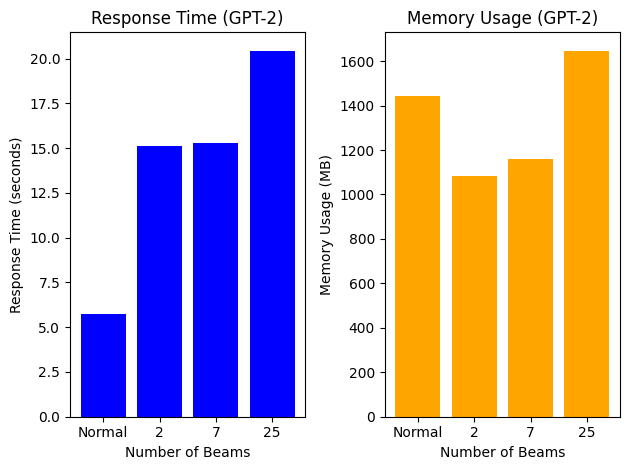

In [25]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
gpt2_m2 = float(f"{max(memory_used_gpt2_twoBeam):.2f}")

# put the memory usage of using seven beams to float variable
gpt2_m7 = float(f"{max(memory_used_gpt2_sevenBeam):.2f}")

# put the memory usage of using twenty-five beam to float variable
gpt2_m25 = float(f"{max(memory_used_gpt2_twentyFiveBeam):.2f}")

# put the memory usage of normal search to float variable
gpt2_mNormal = float(f"{max(memory_used_gpt2_normalSearch):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_gpt2_normalSearch,response_time_gpt2_twoBeam,response_time_gpt2_sevenBeam,response_time_gpt2_twentyFiveBeam]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [gpt2_mNormal,gpt2_m2,gpt2_m7,gpt2_m25]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (GPT-2)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (GPT-2)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

<h3><b>DistilGPT-2 Results</b><h3>

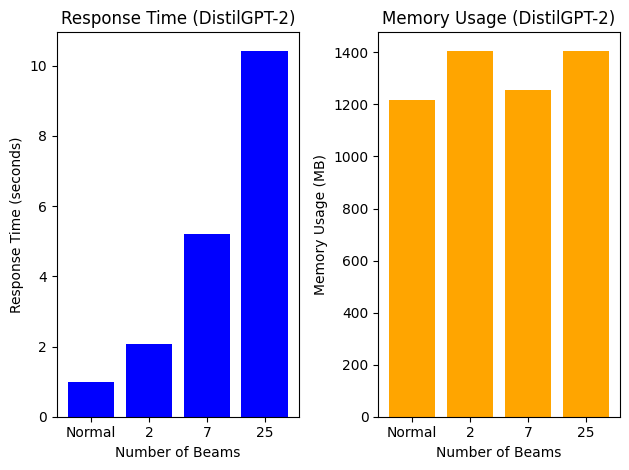

In [26]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
distilgpt2_m2 = float(f"{max(memory_used_distilgpt2_twoBeam):.2f}")

# put the memory usage of using seven beams to float variable
distilgpt2_m7 = float(f"{max(memory_used_distilgpt2_sevenBeam):.2f}")

# put the memory usage of using twenty-five beam to float variable
distilgpt2_m25 = float(f"{max(memory_used_distilgpt2_twentyFiveBeam):.2f}")

# put the memory usage of normal search to float variable
distilgpt2_mNormal = float(f"{max(memory_used_distilgpt2_normalSearch):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_distilgpt2_normalSearch,response_time_distilgpt2_twoBeam,response_time_distilgpt2_sevenBeam,response_time_distilgpt2_twentyFiveBeam]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [distilgpt2_mNormal,distilgpt2_m2,distilgpt2_m7,distilgpt2_m25]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (DistilGPT-2)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (DistilGPT-2)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

<h3><b>BART Results</b><h3>

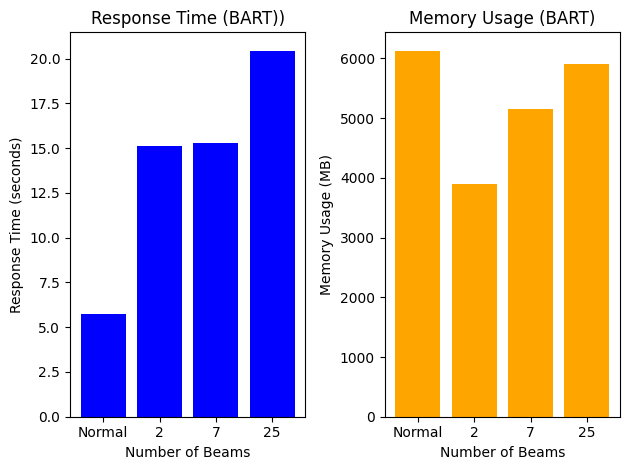

In [27]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
bart_m2 = float(f"{max(memory_used_bart_twoBeam):.2f}")

# put the memory usage of using seven beams to float variable
bart_m7 = float(f"{max(memory_used_bart_sevenBeam):.2f}")

# put the memory usage of using twenty-five beam to float variable
bart_m25 = float(f"{max(memory_used_bart_twentyFiveBeam):.2f}")

# put the memory usage of normal search to float variable
bart_m_normal = float(f"{max(memory_used_bart_normalSearch):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_gpt2_normalSearch,response_time_gpt2_twoBeam,response_time_gpt2_sevenBeam,response_time_gpt2_twentyFiveBeam]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [bart_m_normal,bart_m2,bart_m7,bart_m25]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (BART))')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (BART)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

# <b>Machine Translation with MarianMT</b>

In [19]:
from transformers import MarianMTModel, MarianTokenizer

model_name = "Helsinki-NLP/opus-mt-en-zh"  # English to French translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = "Hello, how are you?"
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Generate translation using beam search
output = model.generate(input_ids, max_length=100, num_beams=5, early_stopping=True)

translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(translated_text)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


你好,你好吗?


normal search

In [20]:
from transformers import MarianMTModel, MarianTokenizer

# Define the model and tokenizer
model_name = "Helsinki-NLP/opus-mt-en-fr"  # English to French translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Input text
input_text = "Hello, how are you?"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Generate translation using "normal" search
output = model.generate(input_ids, max_length=100)

# Decode and print the translation
translated_text_normal = tokenizer.decode(output[0], skip_special_tokens=True)
print("Translation (Normal Search):", translated_text_normal)

Translation (Normal Search): Bonjour, comment allez-vous?


beam search

In [21]:
from transformers import MarianMTModel, MarianTokenizer

# Define the model and tokenizer
model_name = "Helsinki-NLP/opus-mt-en-fr"  # English to French translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Input text
input_text = "Hello, how are you?"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Generate translation using beam search
output = model.generate(input_ids, max_length=100, num_beams=5, early_stopping=True)

# Decode and print the translation
translated_text_beam = tokenizer.decode(output[0], skip_special_tokens=True)
print("Translation (Beam Search):", translated_text_beam)

Translation (Beam Search): Bonjour, comment allez-vous?


In [22]:
from transformers import BertLMHeadModel, BertTokenizer

model_name = "bert-large-uncased-whole-word-masking"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertLMHeadModel.from_pretrained(model_name)

context = "Hugging Face is creating a library for natural language processing."
question = "What is Hugging Face building?"
inputs = tokenizer(question, context, return_tensors="pt")

# Generate answer using beam search
output = model.generate(inputs["input_ids"], max_length=30, num_beams=5, early_stopping=True)

answer = tokenizer.decode(output[0], skip_special_tokens=True)
print(answer)

If you want to use `BertLMHeadModel` as a standalone, add `is_decoder=True.`


what is hugging face building? hugging face is creating a library for natural language processing...........


# testing stuff only

In [23]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Load the pre-trained T5 model and tokenizer
model_name = "t5-base"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Input text
input_text = "Translate the following English text to French:"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Generate text using beam search
beam_output = model.generate(
    input_ids,
    max_length=100,
    num_beams=5,  # Number of beams for beam search
    length_penalty=2.0,  # Adjust the length penalty for diversity (optional)
    early_stopping=True
)

# Decode and print the generated text
generated_text = tokenizer.decode(beam_output[0], skip_special_tokens=True)
print("Generated Text (Beam Search):", generated_text)

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:240: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the

Generated Text (Beam Search): Traduire le texte suivant :
